In [1]:
#linear regression in making

In [4]:
# things we can learn in making this
# how would i know it right now i just started it

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import numpy as np
import pandas as pd

# EDA

In [30]:
df = pd.read_csv("possum.csv")
df1 = pd.read_csv("possum.csv")

In [31]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [32]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [33]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
df.drop(["case"], inplace=True, axis=1) #only a index no need in the data

In [8]:
categorical_column = df.select_dtypes(include="object").columns

In [9]:
df = df.drop(["Pop","sex"], axis=1) # popping out categorical columns and keeping only numerical ones

In [16]:
numerical_column = df.select_dtypes(exclude="object").columns
print(categorical_column, numerical_column)

Index(['Pop', 'sex'], dtype='object') Index(['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [17]:
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [18]:
df.dtypes

site          int64
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [19]:
df.corr().style.background_gradient(cmap="coolwarm")

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716
chest,-0.345494,0.334209,0.631498,0.629737,0.577890,0.174997,0.450590,0.199230,0.149338,1.000000,0.606170


# from the above correlation matrix findings :
#     1.earconch and footlength highest relation
#     2.headlength and skullwidth
#     3.headlength and totlength

In [20]:
colors=["red","blue", "green","orange","black","purple", "brown","pink","red","blue", "green"]

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


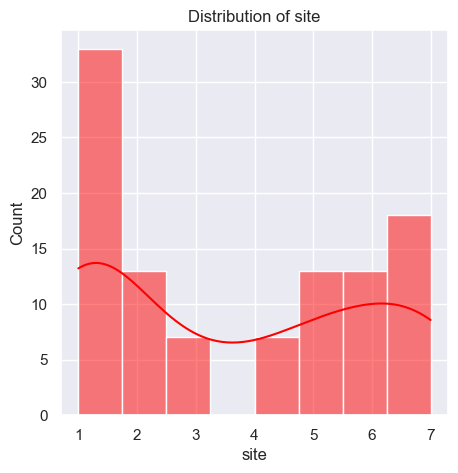

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


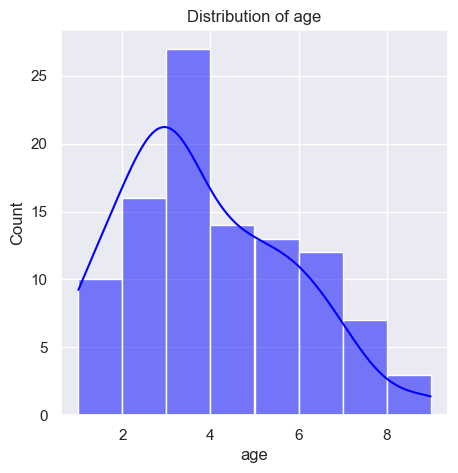

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


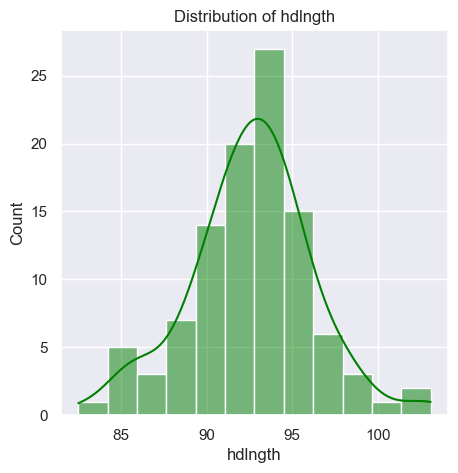

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


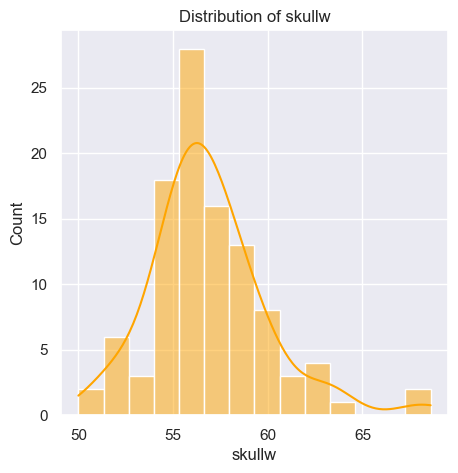

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


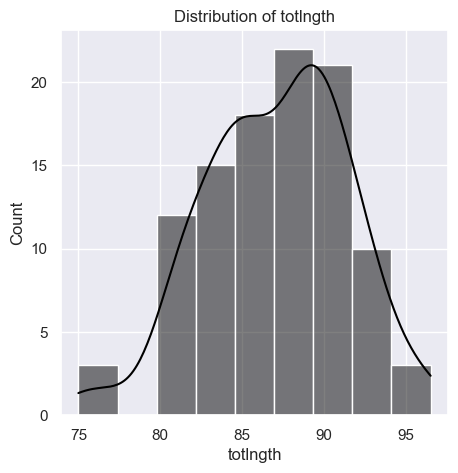

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


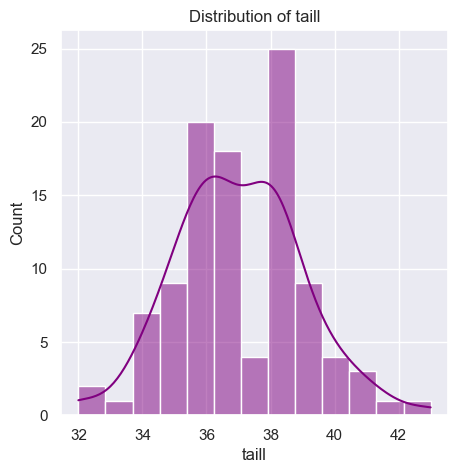

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


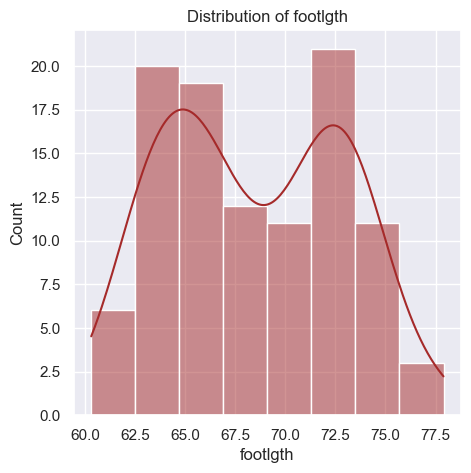

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


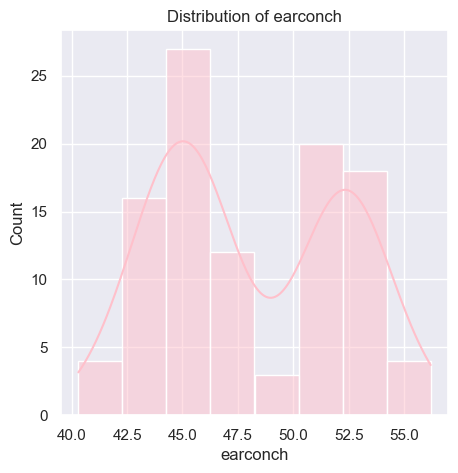

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


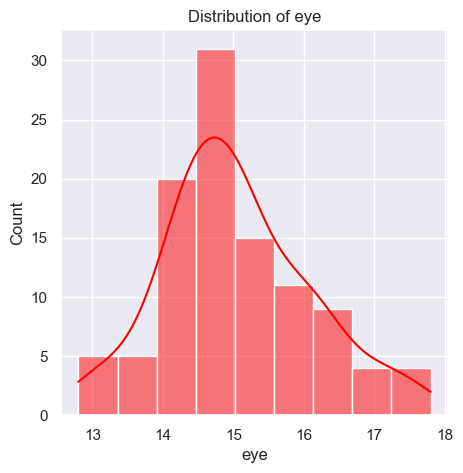

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


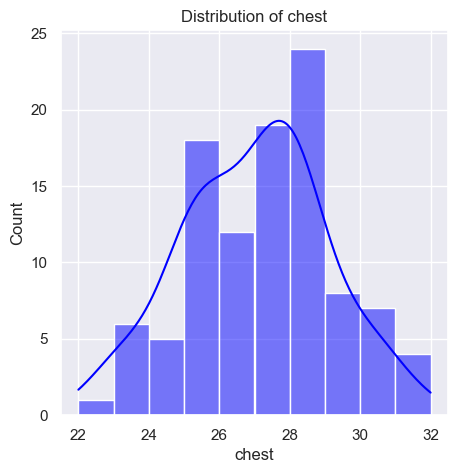

/Users/parz/miniforge3/envs/data-science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


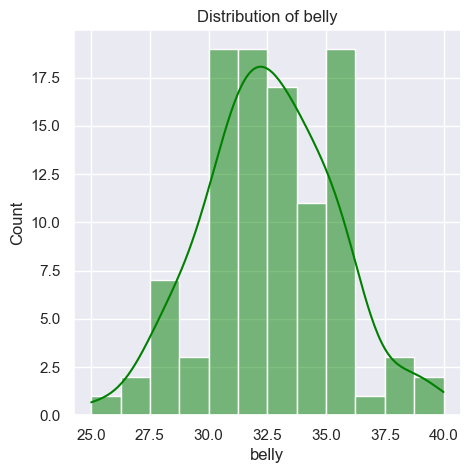

In [21]:
for i in range(11):
    plt.figure(figsize=(5,5))
    sns.set(style="darkgrid")
    sns.histplot(df, x=df[numerical_column[i]], kde=True, color=colors[i])
    plt.title(f"Distribution of {numerical_column[i]}")
    plt.show()

In [23]:
def cat_num_feature_selector(dataframe):
    cat_features = [feature for feature in dataframe.columns if df[feature].dtype=='O']
    num_features = [feature for feature in dataframe.columns if df[feature].dtype!='O']
    return cat_features, num_features

In [24]:
cat, num = cat_num_feature_selector(df)

In [25]:
corr_metrix = df[num].corr()
corr_metrix

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716
chest,-0.345494,0.334209,0.631498,0.629737,0.577890,0.174997,0.450590,0.199230,0.149338,1.000000,0.606170


In [28]:
df.columns

Index(['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

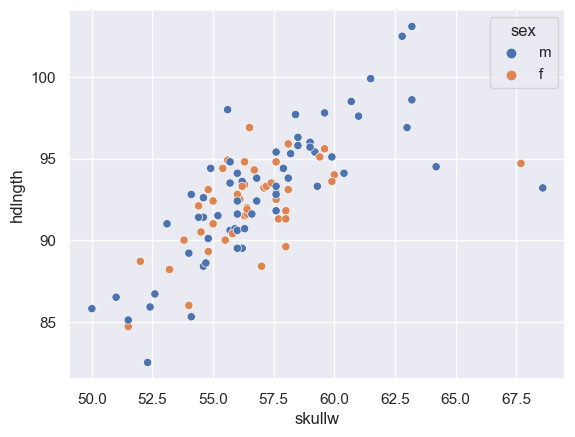

In [34]:
sns.scatterplot(data=df1, x='skullw', y='hdlngth', hue='sex')
plt.show()

In [35]:
# split the data into training and for test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='hdlngth'),
                                    df1['hdlngth'],
                                    test_size=0.25,
                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((78, 13), (26, 13), (78,), (26,))

In [36]:
cat, num = cat_num_feature_selector(X_train)
